In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 1. Základný opis dát spolu s ich charakteristikami


### (A)

In [2]:
def get_dataset_info(dataset):
    print('Počet záznamov:', dataset.shape[0])
    print('Počet atribútov:', dataset.shape[1])
    print('Názvy atribútov:', [*dataset.columns])

    get_attribute_types(dataset)

def get_attribute_types(dataset):
    print('\nDátové typy jednotlivých atribútov:')
    print(dataset.dtypes)

##### Dataset 1: connections.csv

In [3]:
connections = pd.read_csv('data/connections.csv', sep='\t')
connections.head()

,ts,imei,mwra,c.android.gm,c.android.youtube,c.katana,c.dogalize,c.android.chrome,c.android.vending,c.raider,c.UCMobile.intl,c.updateassist,c.UCMobile.x86
0,2018-05-05 10:00:00,3590433799317661073,1.0,10.73779,7.60358,10.30550,12.72137,17.14262,63.02014,52.99201,79.18648,71.70308,82.68561
1,2018-05-05 10:01:00,3590433799317661784,1.0,13.88095,10.68630,8.36266,13.90403,13.28416,54.83081,41.20946,89.97421,25.11522,60.15617
2,2018-05-05 10:02:00,863033069630348917,0.0,9.38536,16.17278,13.29120,5.79980,15.01395,49.94955,55.12888,35.60304,32.90686,28.07780
3,2018-05-05 10:03:00,863033069630348339,1.0,7.29835,16.20768,9.73707,13.21535,9.59391,48.30890,65.90586,70.97902,79.61014,7.25507
4,2018-05-05 10:04:00,3590433799317662212,0.0,12.68999,12.72589,6.94943,9.72027,16.11904,54.58740,50.94873,98.93871,91.55704,12.11459


In [4]:
get_dataset_info(connections)

Počet záznamov: 15160
Počet atribútov: 13
Názvy atribútov: ['ts', 'imei', 'mwra', 'c.android.gm', 'c.android.youtube', 'c.katana', 'c.dogalize', 'c.android.chrome', 'c.android.vending', 'c.raider', 'c.UCMobile.intl', 'c.updateassist', 'c.UCMobile.x86']

Dátové typy jednotlivých atribútov:
ts                    object
imei                   int64
mwra                 float64
c.android.gm         float64
c.android.youtube    float64
c.katana             float64
c.dogalize           float64
c.android.chrome     float64
c.android.vending    float64
c.raider             float64
c.UCMobile.intl      float64
c.updateassist       float64
c.UCMobile.x86       float64
dtype: object


Kategorické atribúty: **ts, imei**

Numerické atribúty: **mwra,** všetky začínajúce **c.**

##### Dataset 2: devices.csv

In [5]:
devices = pd.read_csv('data/devices.csv', sep='\t')
devices.head()

,latitude,longitude,store_name,code,location,imei
0,15.58552,102.42587,Bua Yai,TH,Asia/Bangkok,3590433799317661925
1,52.59319,13.32127,Wittenau,DE,Europe/Berlin,8630330696303482139
2,35.88264,-80.08199,Thomasville,US,America/New_York,863033069630348537
3,42.28639,18.84000,Budva,ME,Europe/Podgorica,863033069630348438
4,46.51872,86.00214,Hoxtolgay,CN,Asia/Urumqi,3590433799317661529


In [6]:
get_dataset_info(devices)

Počet záznamov: 2980
Počet atribútov: 6
Názvy atribútov: ['latitude', 'longitude', 'store_name', 'code', 'location', 'imei']

Dátové typy jednotlivých atribútov:
latitude      float64
longitude     float64
store_name     object
code           object
location       object
imei            int64
dtype: object


Kategorické atribúty: všetky

##### Dataset 3: processes.csv

In [7]:
processes = pd.read_csv('data/processes.csv', sep='\t')
processes.head()

,ts,imei,mwra,p.android.chrome,p.system,p.android.externalstorage,p.android.packageinstaller,p.android.documentsui,p.android.gm,p.android.settings,...,p.dogalize,p.android.defcontainer,p.google,p.android.gms,p.olauncher,p.android.vending,p.browser.provider,p.process.gapps,p.gms.persistent,p.simulator
0,2018-05-05 10:00:00,3590433799317661073,1.0,13.85861,7.64793,7.27894,9.57361,8.33502,9.63344,14.10782,...,49.63998,52.22598,86.79731,88.93302,12.84506,2.63115,90.52801,90.51873,35.23943,93.56427
1,2018-05-05 10:01:00,3590433799317661784,1.0,15.41892,14.08046,6.67208,9.29380,9.44110,7.40963,14.00144,...,50.35593,45.19193,87.84568,25.99896,90.22100,71.68478,89.94562,71.77292,64.49298,42.81274
2,2018-05-05 10:02:00,863033069630348917,0.0,9.02474,10.64196,12.71551,14.92095,10.43897,10.23411,12.33791,...,51.05029,29.87061,59.48429,45.04187,1.58945,13.22444,88.76900,64.93572,45.52142,44.37595
3,2018-05-05 10:03:00,863033069630348339,1.0,7.73562,16.25267,8.75428,10.09556,10.68004,7.78818,11.13198,...,61.63920,86.63658,18.00165,20.65816,22.51564,28.59876,62.69179,34.25119,4.52876,72.11141
4,2018-05-05 10:04:00,3590433799317662212,0.0,7.46264,12.82177,10.80300,4.85724,12.01441,9.38242,17.40947,...,36.14104,41.29170,72.44112,93.65874,50.08215,38.17231,6.71236,72.23466,68.04155,33.38015


In [8]:
get_dataset_info(processes)

Počet záznamov: 15160
Počet atribútov: 23
Názvy atribútov: ['ts', 'imei', 'mwra', 'p.android.chrome', 'p.system', 'p.android.externalstorage', 'p.android.packageinstaller', 'p.android.documentsui', 'p.android.gm', 'p.android.settings', 'p.inputmethod.latin', 'p.notifier', 'p.katana', 'p.dogalize', 'p.android.defcontainer', 'p.google', 'p.android.gms', 'p.olauncher', 'p.android.vending', 'p.browser.provider', 'p.process.gapps', 'p.gms.persistent', 'p.simulator']

Dátové typy jednotlivých atribútov:
ts                             object
imei                            int64
mwra                          float64
p.android.chrome              float64
p.system                      float64
p.android.externalstorage     float64
p.android.packageinstaller    float64
p.android.documentsui         float64
p.android.gm                  float64
p.android.settings            float64
p.inputmethod.latin           float64
p.notifier                    float64
p.katana                      float64
p.d

Kategorické atribúty: **ts, imei**

Numerické atribúty: **mwra,** všetky začínajúce **p.**

##### Dataset 4: profiles.csv

In [9]:
profiles = pd.read_csv('data/profiles.csv', sep='\t')
profiles.head()

,residence,username,birthdate,imei,name,ssn,registration,address,company,user_id,mail,current_location
0,NaN,benjaminlinda,NaN,359043379931766536,Barry Clay,380-33-1115,2022/11/01,"836 Johnson Throughway\nPort Ritaborough, AR 3...",Montgomery Group,322,jamesrichard@hotmail.com,"(Decimal('29.2545215'), Decimal('56.881839'))"
1,NaN,emilyanderson,NaN,3590433799317662154,Justin Clark,244-95-2123,2023/11/28,"84743 Anna Vista\nEast Jaredborough, MT 07310",Williams-Smith,1634,steve96@hotmail.com,"(Decimal('-73.8245355'), Decimal('-147.436751'))"
2,NaN,vfriedman,NaN,3590433799317662162,Kimberly Atkinson,052-18-1099,11 Apr 2020,USNV Carrillo\nFPO AA 27278,"Khan, Dodson and Frank",1538,robert85@yahoo.com,"(Decimal('10.6039875'), Decimal('-82.963400'))"
3,NaN,utaylor,1985-11-17,3590433799317661347,David Robinson,035-28-4630,01 Aug 2019,"297 Berry Creek Suite 292\nChristophershire, M...",Klein-Lopez,1661,emmamatthews@gmail.com,"(Decimal('-71.951311'), Decimal('-90.881496'))"
4,NaN,xpierce,2018-11-04,359043379931766064,Victoria Nguyen,754-23-6927,"03/02/2022, 00:00:00","164 Osborne Oval Suite 980\nAshleyville, CO 24401",Tran LLC,1676,ginamartin@yahoo.com,"(Decimal('0.3168465'), Decimal('-24.514492'))"


In [10]:
get_dataset_info(profiles)

Počet záznamov: 2520
Počet atribútov: 12
Názvy atribútov: ['residence', 'username', 'birthdate', 'imei', 'name', 'ssn', 'registration', 'address', 'company', 'user_id', 'mail', 'current_location']

Dátové typy jednotlivých atribútov:
residence           object
username            object
birthdate           object
imei                 int64
name                object
ssn                 object
registration        object
address             object
company             object
user_id              int64
mail                object
current_location    object
dtype: object


Kategorické atribúty: všetky

##### Vzťahy medzi datasetmi

In [11]:
from itertools import combinations

dataframes = enumerate([connections, devices, processes, profiles])
names = ['connections', 'devices', 'processes', 'profiles']

print('Počet súborov:', len(names))
print('Súbory:', ', '.join([name + '.csv' for name in names]))

print('\nZdieľané atribúty:')
for df_a, df_b in combinations(dataframes, 2):
    shared_columns = set(df_a[1].columns).intersection(df_b[1].columns)
    
    print(f'{names[df_a[0]]} \t {names[df_b[0]]} \t {list(shared_columns)}')

Počet súborov: 4
Súbory: connections.csv, devices.csv, processes.csv, profiles.csv

Zdieľané atribúty:
connections 	 devices 	 ['imei']
connections 	 processes 	 ['mwra', 'ts', 'imei']
connections 	 profiles 	 ['imei']
devices 	 processes 	 ['imei']
devices 	 profiles 	 ['imei']
processes 	 profiles 	 ['imei']


Všetky datasety zdieľajú atribút **imei**.

Datasety _connections_ a _processes_ zdieľajú aj atribúty **mwra** a **ts**.

**imei**: jedinečný identifikátor zariadenia

**mwra**: malware related activity

**ts**: timestamp (čas)

Na základe všetkých týchto troch atribútov by bolo teoreticky možné spojiť tabuľky _connections_ a _processes_ do jednej. 

### (B)

##### Zvolené dôležité atribúty
- **connections**: 'c.android.gm', 'c.android.youtube', 'c.katana', 'c.updateassist', 'c.dogalize'
- **processes**: 'p.android.chrome', 'p.google', 'p.system', 'p.android.packageinstaller', 'p.android.documentsui'

Súbory **devices** a **profiles** by nemali mať na vývoj _mwra_ výrazný vplyv.

In [12]:
def get_description(dataset, attribute):
    df = dataset[attribute]
    print(df.describe())
    
    get_unique_values(df)
    get_distribution(df)

def get_unique_values(df):
    unique = df.unique()
    print('\nPočet unikátnych hodnôt:', len(unique))
    print('Unikátne hodnoty:', unique)

def get_distribution(df): 
    ks = stats.kstest(df, 'norm')
    variance = np.var(df)

    print('\nK-S Test:', ks.pvalue)
    
    if ks.pvalue > 0.05:
        print('Dáta sú normálne distribuované.')
    else:
        print('Dáta nie sú normálne distribuované')
    
    print('Variácia:', variance)
    sns.histplot(df)


Nakoľko súbory obsahujú veľa záznamov, n>5000, shapiro test môže ukazovať nepresné výsledky. Preto v našom riešení na zistenie normálnej distribúcie budeme používať K-S test a Anderson test.

c.android.gm

count    15160.000000
mean        11.027970
std          2.560378
min          0.000000
25%          9.144557
50%         11.154775
75%         12.945265
max         19.297030
Name: c.android.gm, dtype: float64

Počet unikátnych hodnôt: 14863
Unikátne hodnoty: [10.73779 13.88095  9.38536 ...  8.82572 12.34809 11.37445]

K-S Test: 0.0
Dáta nie sú normálne distribuované
Variácia: 6.555102801052142


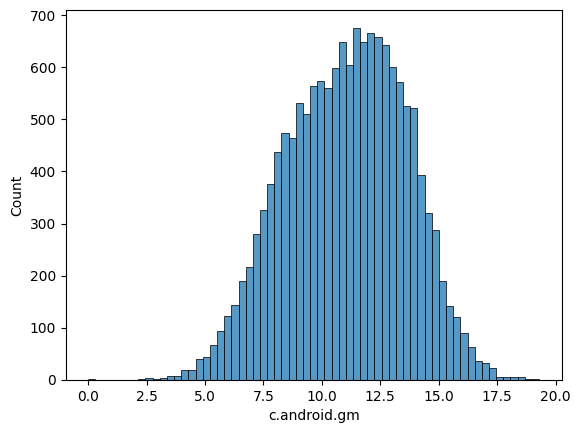

In [13]:
get_description(connections, 'c.android.gm')

c.android.youtube

count    15160.000000
mean        11.659965
std          2.427547
min          3.559390
25%          9.827303
50%         11.720195
75%         13.404993
max         20.936200
Name: c.android.youtube, dtype: float64

Počet unikátnych hodnôt: 14855
Unikátne hodnoty: [ 7.60358 10.6863  16.17278 ...  9.88394  7.72316 12.91379]

K-S Test: 0.0
Dáta nie sú normálne distribuované
Variácia: 5.892596601301847


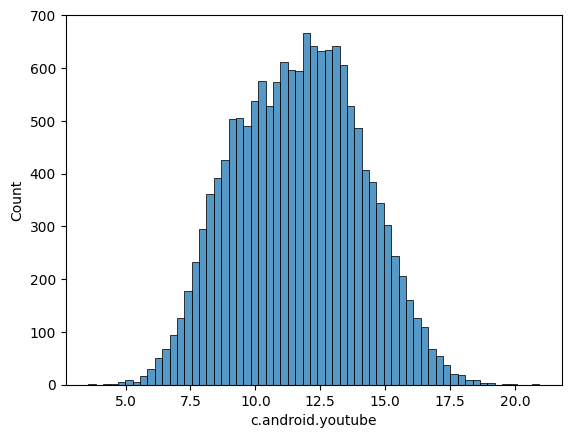

In [14]:
get_description(connections, 'c.android.youtube')

c.katana

count    15160.000000
mean        10.478311
std          2.611144
min          0.521960
25%          8.607812
50%         10.354100
75%         12.307950
max         21.120630
Name: c.katana, dtype: float64

Počet unikátnych hodnôt: 14859
Unikátne hodnoty: [10.3055   8.36266 13.2912  ... 11.90293  9.35521  8.94454]

K-S Test: 0.0
Dáta nie sú normálne distribuované
Variácia: 6.817624639869279


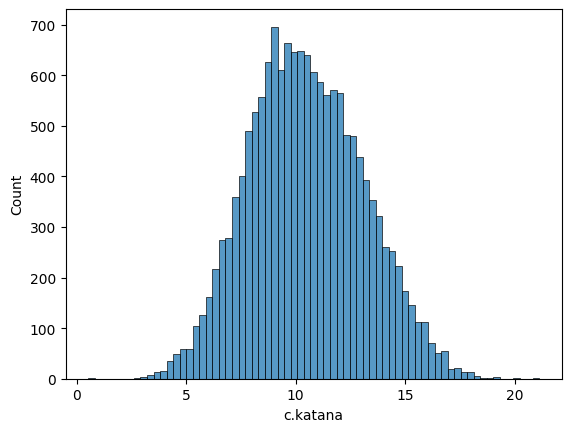

In [15]:
get_description(connections, 'c.katana')

c.updateassist

count    15160.000000
mean        50.018180
std         28.948564
min          0.000000
25%         24.898347
50%         50.318470
75%         74.943438
max        100.000000
Name: c.updateassist, dtype: float64

Počet unikátnych hodnôt: 14965
Unikátne hodnoty: [71.70308 25.11522 32.90686 ... 83.6321  20.37678 45.43466]

K-S Test: 0.0
Dáta nie sú normálne distribuované
Variácia: 837.96408605087


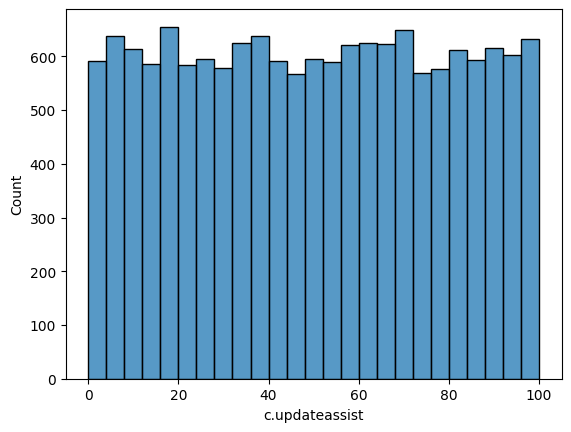

In [16]:
get_description(connections, 'c.updateassist')

c.dogalize

count    15160.000000
mean        11.545323
std          2.613523
min          2.338060
25%          9.643655
50%         11.569810
75%         13.436723
max         20.490790
Name: c.dogalize, dtype: float64

Počet unikátnych hodnôt: 14875
Unikátne hodnoty: [12.72137 13.90403  5.7998  ... 10.46331 15.6854   8.9659 ]

K-S Test: 0.0
Dáta nie sú normálne distribuované
Variácia: 6.830053157649522


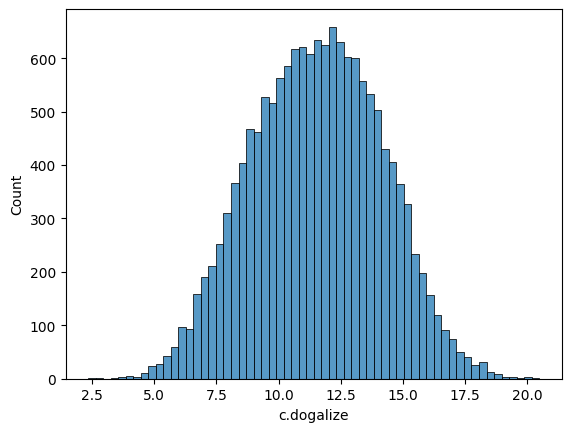

In [17]:
get_description(connections, 'c.dogalize')

p.android.chrome

count    15160.000000
mean        10.386023
std          2.590363
min          2.171830
25%          8.548547
50%         10.073305
75%         12.011582
max         21.849440
Name: p.android.chrome, dtype: float64

Počet unikátnych hodnôt: 14847
Unikátne hodnoty: [13.85861 15.41892  9.02474 ...  9.91237 15.80183  6.2933 ]

K-S Test: 0.0
Dáta nie sú normálne distribuované
Variácia: 6.709535932983072


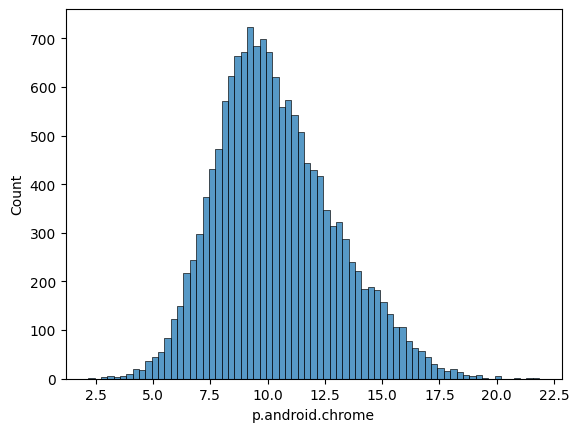

In [18]:
get_description(processes, 'p.android.chrome')

p.google

count    15160.000000
mean        49.659617
std         28.970207
min          0.000000
25%         24.701352
50%         49.239315
75%         74.843225
max        100.000000
Name: p.google, dtype: float64

Počet unikátnych hodnôt: 14976
Unikátne hodnoty: [86.79731 87.84568 59.48429 ...  5.36384  6.20594  6.66866]

K-S Test: 0.0
Dáta nie sú normálne distribuované
Variácia: 839.2175445251015


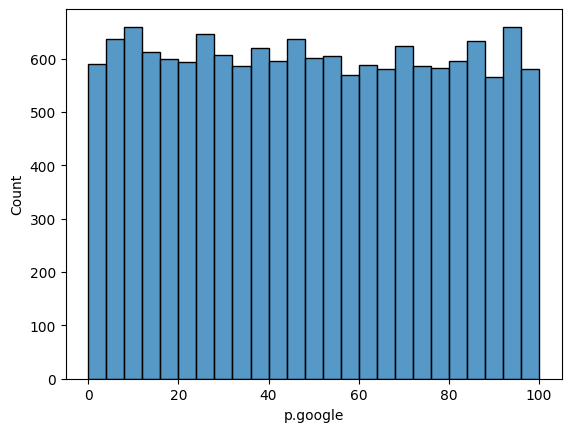

In [19]:
get_description(processes, 'p.google')

p.system

count    15160.000000
mean        11.021445
std          2.792024
min          0.391320
25%          9.015808
50%         11.019560
75%         13.015192
max         21.750310
Name: p.system, dtype: float64

Počet unikátnych hodnôt: 14872
Unikátne hodnoty: [ 7.64793 14.08046 10.64196 ... 10.64953  9.4625   9.95725]

K-S Test: 0.0
Dáta nie sú normálne distribuované
Variácia: 7.794882105159191


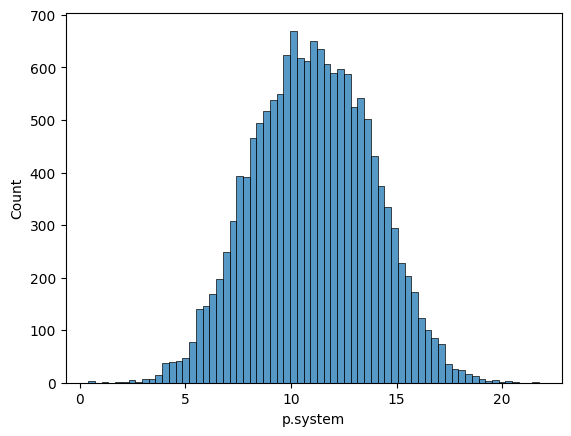

In [20]:
get_description(processes, 'p.system')

p.android.packageinstaller

count    15160.000000
mean        10.479725
std          2.576213
min          1.563850
25%          8.590737
50%         10.461030
75%         12.429803
max         19.729040
Name: p.android.packageinstaller, dtype: float64

Počet unikátnych hodnôt: 14855
Unikátne hodnoty: [ 9.57361  9.2938  14.92095 ...  9.67654 10.61643 11.0495 ]

K-S Test: 0.0
Dáta nie sú normálne distribuované
Variácia: 6.636433783371936


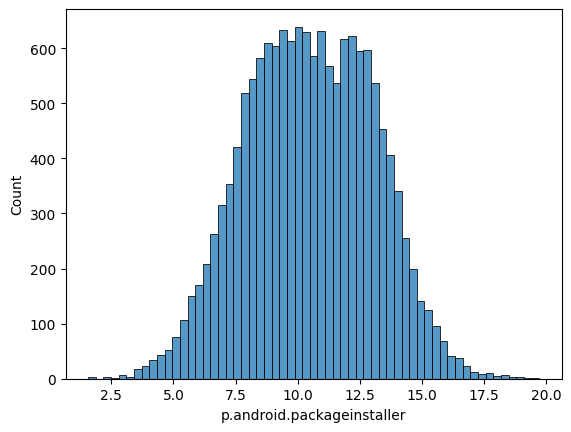

In [21]:
get_description(processes, 'p.android.packageinstaller')

p.android.documentsui

count    15160.000000
mean        10.368350
std          2.403547
min          3.126100
25%          8.656420
50%         10.071015
75%         11.959665
max         19.542390
Name: p.android.documentsui, dtype: float64

Počet unikátnych hodnôt: 14845
Unikátne hodnoty: [ 8.33502  9.4411  10.43897 ... 11.74081  6.74787 14.64721]

K-S Test: 0.0
Dáta nie sú normálne distribuované
Variácia: 5.776655537056104


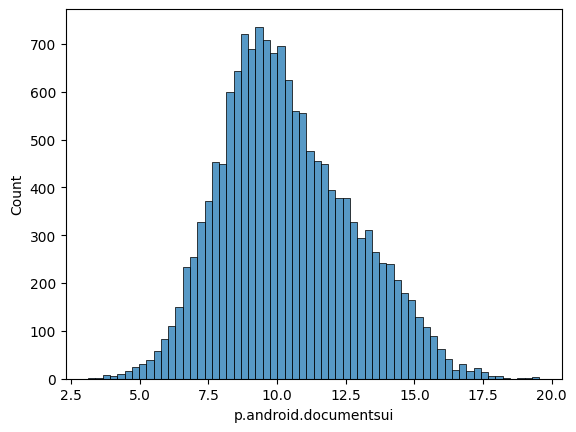

In [22]:
get_description(processes, 'p.android.documentsui')

### (C)

#### Párová analýza dát
Párovú analýzu dát pre numerické hodnoty uskutočníme pomocou _korelačnej tabuľky_, ktorá ukáže potenciálne súvisloti medzi atribútmi.
Súbory, ktoré obsahujú prevažne numerické údaje: **connections**, **processes**

Párovú analýzu dát pre kategorické hodnoty spravíme pre atribút **location** (konkrétne kontinent) v súbore **devices** a pozitívnu hodnotu mwra (1) v súbore **connections**.

<Axes: >

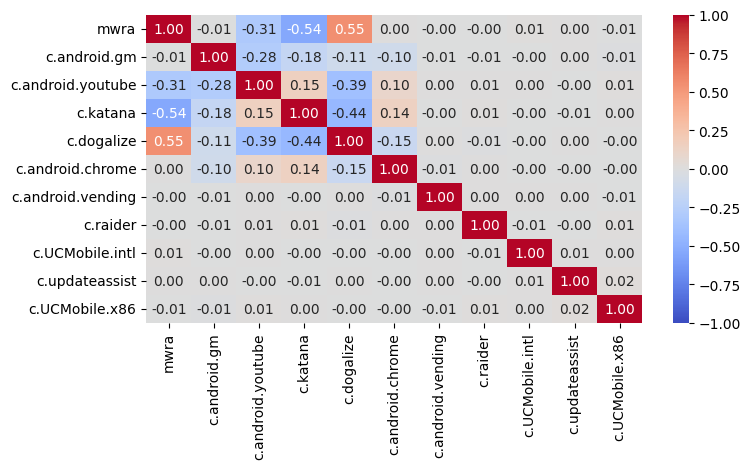

In [23]:
connections_corr = connections.corr(numeric_only=True)
connections_corr = connections_corr.drop('imei', axis=1).drop('imei', axis=0)

plt.figure(figsize=(8, 4))
sns.heatmap(connections_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

Z tabuľky je vidno stredne pozitívnu koreláciu medzi mwra a c.dogalize a stretne negatívnu koreláciu medzi mwra a c.katana. Toto môžu byť logické korelácie, pretože pripojenia na rozličné aplikácie môžu mať vplyv na hodnotu mwra. Ďalšia stredne negatívna korelácia je medzi c.katana a c.dogalize, čo môže byť skôr náhodná korelácia. Skutočný vzájomný vplyv týchto atribútov musíme ešte overiť.

<Axes: >

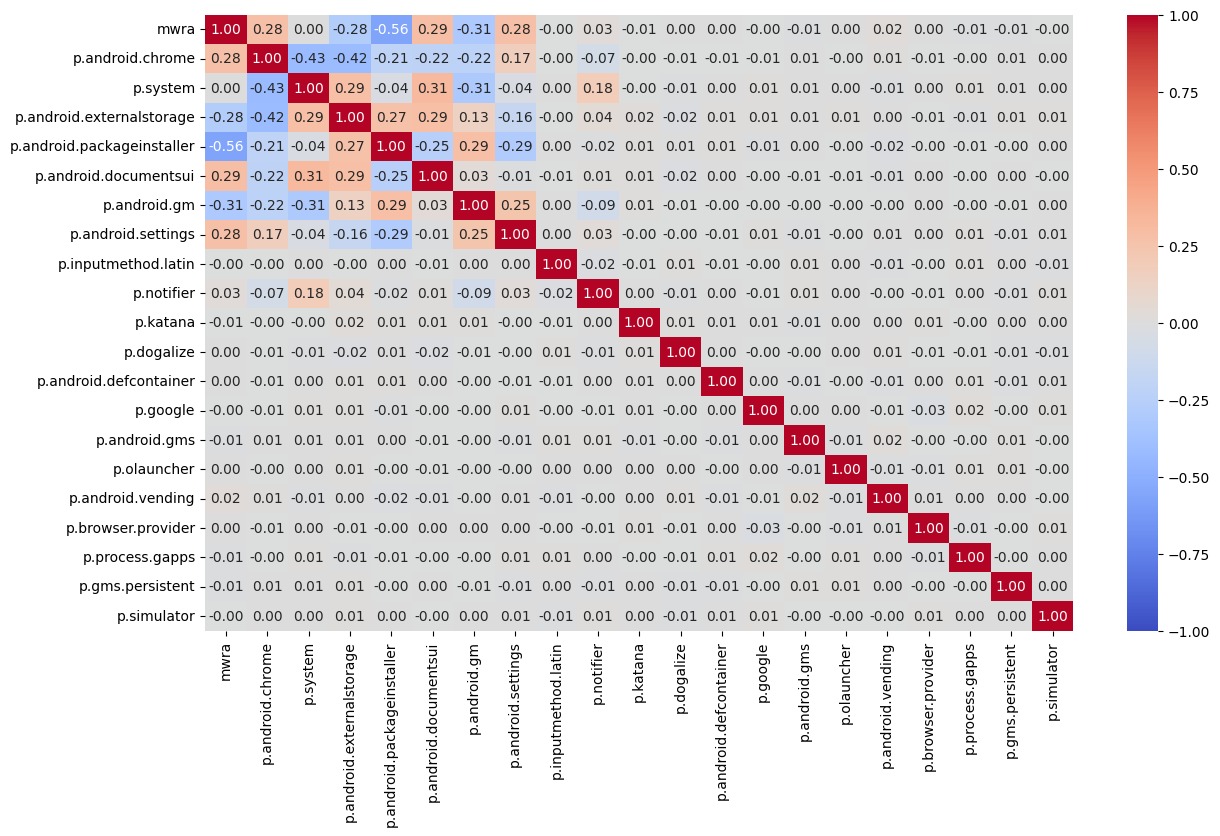

In [24]:
processes_corr = processes.corr(numeric_only=True)
processes_corr = processes_corr.drop('imei', axis=1).drop('imei', axis=0)

plt.figure(figsize=(14, 8))
sns.heatmap(processes_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

Z tabuľky je vidno stredne negatívnu koreláciu medzi mwra a p.packageinstaller a mierne pozitívnu koreláciu medzi p.android.externalstorage a p.android.documentsui. Môže ísť o skutočný vplyv, ale treba tieto zistenia ešte potvrdiť.

Celkové rozdelenie záznamov podľa kontinentu:


,continent,records
0,Africa,7773
1,America,26572
2,Asia,25566
3,Atlantic,179
4,Australia,1032
5,Europe,28597
6,Indian,529
7,Pacific,527


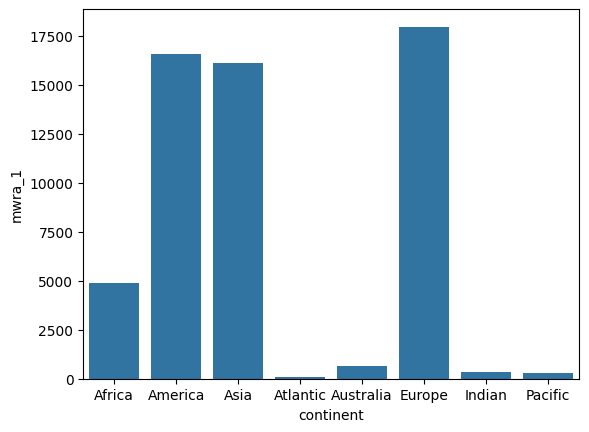

In [25]:
connection_devices = pd.merge(connections, devices, on='imei', how='inner')

connection_devices_split = connection_devices['location'].str.split('/', expand=True)
connection_devices_split.columns = ['continent', 'country', 'city']

connection_devices = pd.concat([connection_devices, connection_devices_split], axis=1)
connection_devices_grouped = connection_devices[connection_devices['mwra'] == 1].groupby('continent').size().reset_index(name='mwra_1')

continent_records = connection_devices.groupby('continent').size().reset_index(name='records')

sns.barplot(data=connection_devices_grouped, x='continent', y='mwra_1')

print('Celkové rozdelenie záznamov podľa kontinentu:')
pd.DataFrame(continent_records)

Zisťovali sme aj pomer pripojení s hodnotou mwra=1 v rozličných kontinentoch podľa imei zariadenia. Lokalita nemá na vývoj mwra žiadny vplyv, pretože pomer výsledkov s mwra=1 približne kopíruje celkový počet záznamov.

### (D)

V nasledujúcich pair plotoch si ukážeme 4 atribúty pre súbory connections a processes, ktoré najviac korelujú s atribútom mwra. (pozitívne aj negatívne korelácie)

In [26]:
print('Korelácie s atribútom mwra v datasete connections:')
connections_corr_columns = pd.DataFrame(connections_corr['mwra'].drop('mwra'))
connections_corr_columns.rename(columns={ 'mwra': 'corr' }, inplace=True)

pd.DataFrame(connections_corr_columns)

Korelácie s atribútom mwra v datasete connections:


,corr
c.android.gm,-0.005328
c.android.youtube,-0.308474
c.katana,-0.543591
c.dogalize,0.547656
c.android.chrome,0.004045
c.android.vending,-0.003360
c.raider,-0.003713
c.UCMobile.intl,0.007997
c.updateassist,0.000169
c.UCMobile.x86,-0.005534


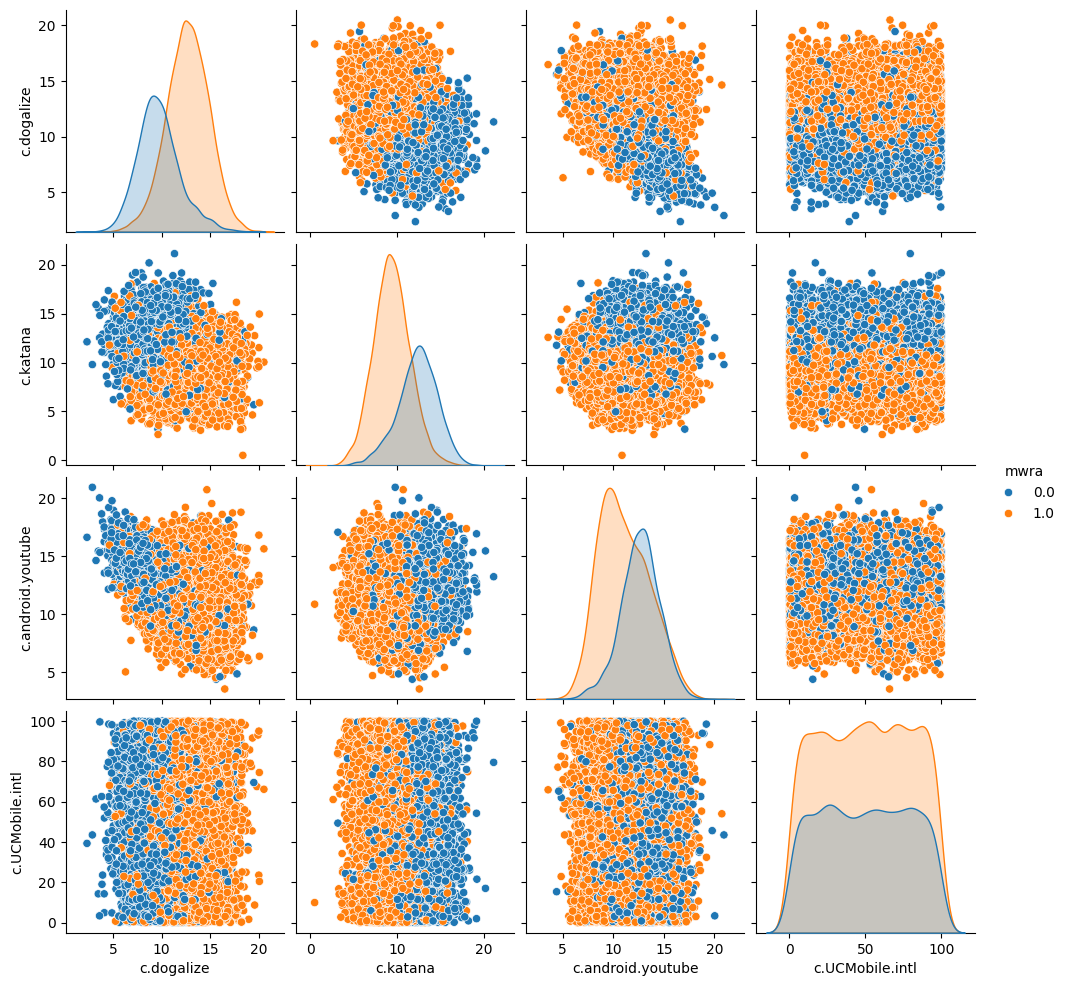

In [27]:
connections_corr_top = connections_corr_columns['corr'].abs().nlargest(4)

connections_corr_top_columns = connections_corr_top.index.tolist()
connections_corr_top_columns.append('mwra')

connections_corr_top_df = connections[connections_corr_top_columns]

sns.pairplot(connections_corr_top_df, hue='mwra')

In [28]:
print('Korelácie s atribútom mwra v datasete processes:')
processes_corr_columns = pd.DataFrame(processes_corr['mwra'].drop('mwra'))
processes_corr_columns.rename(columns={ 'mwra': 'corr' }, inplace=True)

pd.DataFrame(processes_corr_columns)

Korelácie s atribútom mwra v datasete processes:


,corr
p.android.chrome,0.281226
p.system,0.001653
p.android.externalstorage,-0.280496
p.android.packageinstaller,-0.564430
p.android.documentsui,0.294514
p.android.gm,-0.314852
p.android.settings,0.275792
p.inputmethod.latin,-0.003753
p.notifier,0.026986
p.katana,-0.005772


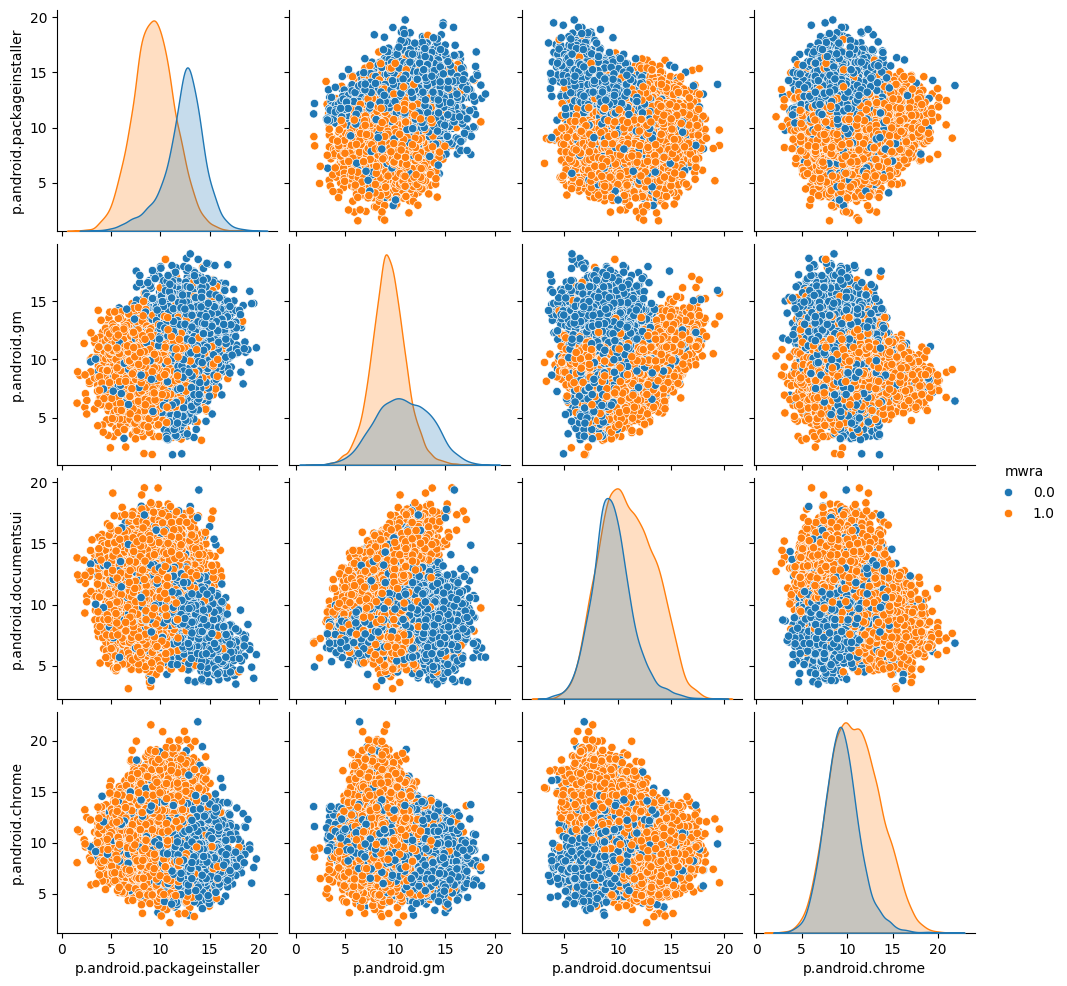

In [29]:
processes_corr_top = processes_corr_columns['corr'].abs().nlargest(4)

processes_corr_top_columns = processes_corr_top.index.tolist()
processes_corr_top_columns.append('mwra')

processes_corr_top_df = processes[processes_corr_top_columns]

sns.pairplot(processes_corr_top_df, hue='mwra')

### (E)

##### Vzájomná závislosť atribútov

Vývoj predikovanej premennej mwra podľa zistení môžu ovplyvňovať niektoré aplikácie a procesy. Napríklad c.katana a c.android.youtube, ktoré sú bezpečné aplikácie môžu zaznamenať negatívny výskyt mwra. Naopak c.dogalize, čo je neznáma aplikácia, môže zaznamenať pozitívny výskyt. 

Proces p.android.packageinstaller môže mať negatívny vplyv na hodnotu mwra, pretože ide o systémový proces, ale taktiež môže ísť aj o false-negative výsledky, lebo všeobecne package installer môže mat vplyv na malware related aktivitu. Ďalší logický vzťah môže byť medzi p.system a p.android.externalstorage, kedže ide o súvisiace systémové procesy.

##### Kombinovanie záznamov viacerých súborov

Doteraz nebolo potrebné kombinovať záznamy z viacerých súborov. Súbory profiles a devices obsahujú veľa chýbajúcich alebo zle formátovaných záznamov a prevažne kategorické atribúty. V ďalších fázach projektu možno budú tieto súbory dôležité pre rozšírenú analýzu alebo identifikáciu zariadenia a používateľa podľa ich ID. Súbory connections a processes by sa mohli dať kombinovať.

## 2. Identifikácia problémov, integrácia a čistenie dát

### (A) (B)

Odstránenie duplicitných záznamov.

In [30]:
def remove_dupes():
    connections.drop_duplicates()
    devices.drop_duplicates()
    processes.drop_duplicates()
    profiles.drop_duplicates()

remove_dupes()

Zmena dátového typu ts z object na datetime pre uľahčenie práce.

In [31]:
processes["ts"] = pd.to_datetime(processes["ts"])
connections["ts"] = pd.to_datetime(connections["ts"])

#### Formátovanie profiles

Konverzia súradníc: Preformátuje stĺpec current_location na súradnice (šírka a dĺžka) ako float, pričom nahradí chýbajúce hodnoty reťazcom "Unknown".

Úprava textu: Odstráni znaky \r\n zo stĺpcov residence a address a nahradí ich medzerami.

Doplnenie chýbajúcich údajov: V stĺpcoch address a residence nahradí chýbajúce hodnoty údajmi z druhého stĺpca alebo reťazcom "Unknown".

Spracovanie e-mailov: Extrahuje doménu zo stĺpca mail a uloží ju do nového stĺpca domain.

Formátovanie dátumov: Prevedie dátumy v stĺpci registration na formát MM/DD/YYYY a spracuje neplatné dátumy.

In [32]:
import re

def convert_decimal_string_to_floats(location):
    if isinstance(location, str):
        match = re.findall(r"[-+]?\d*\.\d+|\d+", location)
        if match and len(match) == 2:
            return (float(match[0]), float(match[1]))
    elif isinstance(location, tuple) and len(location) == 2:
        return (float(location[0]), float(location[1]))

profiles['current_location'] = profiles['current_location'].apply(convert_decimal_string_to_floats)
profiles[['latitude', 'longitude']] = pd.DataFrame(profiles['current_location'].tolist(), index=profiles.index)
profiles["latitude"] = profiles["latitude"].fillna("Unknown")
profiles["longitude"] = profiles["longitude"].fillna("Unknown")
profiles = profiles.drop(columns=['current_location', 'birthdate'])
profiles["address"] = profiles["address"].fillna(profiles["residence"])
profiles["residence"] = profiles["residence"].fillna(profiles["address"])
profiles["address"] = profiles["address"].fillna("Unknown")
profiles["residence"] = profiles["residence"].fillna("Unknown")
profiles['residence'] = profiles['residence'].str.replace(r'[\r\n]+', ' ', regex=True).str.strip()
profiles['address'] = profiles['address'].str.replace(r'[\r\n]+', ' ', regex=True).str.strip()  

def split_mail(mail):
    parts = mail.split('@')
    return parts[1]

profiles['domain'] = pd.DataFrame(profiles['mail'].apply(split_mail))

def convert_registration_date(date_str):
    date = pd.to_datetime(date_str, errors='coerce') 
    return date.strftime('%m/%d/%Y') if pd.notnull(date) else None

profiles['registration'] = profiles['registration'].apply(convert_registration_date)

profiles.head()

,residence,username,imei,name,ssn,registration,address,company,user_id,mail,latitude,longitude,domain
0,"836 Johnson Throughway Port Ritaborough, AR 37029",benjaminlinda,359043379931766536,Barry Clay,380-33-1115,11/01/2022,"836 Johnson Throughway Port Ritaborough, AR 37029",Montgomery Group,322,jamesrichard@hotmail.com,29.254521,56.881839,hotmail.com
1,"84743 Anna Vista East Jaredborough, MT 07310",emilyanderson,3590433799317662154,Justin Clark,244-95-2123,11/28/2023,"84743 Anna Vista East Jaredborough, MT 07310",Williams-Smith,1634,steve96@hotmail.com,-73.824535,-147.436751,hotmail.com
2,USNV Carrillo FPO AA 27278,vfriedman,3590433799317662162,Kimberly Atkinson,052-18-1099,04/11/2020,USNV Carrillo FPO AA 27278,"Khan, Dodson and Frank",1538,robert85@yahoo.com,10.603988,-82.9634,yahoo.com
3,"297 Berry Creek Suite 292 Christophershire, MP...",utaylor,3590433799317661347,David Robinson,035-28-4630,08/01/2019,"297 Berry Creek Suite 292 Christophershire, MP...",Klein-Lopez,1661,emmamatthews@gmail.com,-71.951311,-90.881496,gmail.com
4,"164 Osborne Oval Suite 980 Ashleyville, CO 24401",xpierce,359043379931766064,Victoria Nguyen,754-23-6927,03/02/2022,"164 Osborne Oval Suite 980 Ashleyville, CO 24401",Tran LLC,1676,ginamartin@yahoo.com,0.316846,-24.514492,yahoo.com


#### Odstránenie záznamov s hodnotou NaN v DataFrame devices. 

Hodnotu NaN v tomto DataFrame majú len 2 záznamy, preto si môžme dovoliť odstrániť záznamy bez toho, aby sme stratili veľa dát.

In [33]:
devices = devices.dropna()

#### Zjednotenie formátu location a rozdelenie na continent a city v DataFrame processes.

Niektoré záznamy mali location vo formáte kontinent/štát/mesto a niektoré kontinent/mesto , všetky záznamy pretransformujeme na jednotný formát - kontinent/mesto.

In [34]:
def clean_location(location):
    parts = location.split('/')

    if len(parts) == 3:
        return f"{parts[0]}/{parts[2]}"
    else:
        return location 

devices['location'] = devices['location'].apply(clean_location)
devices[['continent', 'city']] = devices['location'].str.split('/', expand=True)
devices = devices.drop(columns=['location'])

### (C)

#### Odstránenie vychýlených hodnôt

Vychýlené hodnoty môžu výrazne ovplyvniť štatistické ukazovatele ako priemer, štandardnú odchýlku či koreláciu, čo vedie k nepresným alebo zavádzajúcim záverom.

##### Nahradenie vychýlených hodnôt hraničnými hodnotami v DataFrame processes.

Zvolili sme deviation limit = 3x štandardná odchýlka na základe empirického pravidla, ktoré hovorí, že 99,7 % údajov v normálnom rozdelení spadá do tohto rozsahu, čím sa hodnoty za touto hranicou stávajú pravdepodobne vychýlenými hodnotami. Táto metóda poskytuje vyvážený spôsob detekcie a spracovania extrémnych hodnôt pri zachovaní väčšiny platných údajov.

In [35]:
for column in processes.columns[2:]:
    avg_value = processes[column].mean()
    deviation_limit = 3 * processes[column].std()
    
    upper_bound = avg_value + deviation_limit
    processes.loc[processes[column] > upper_bound, column] = upper_bound

    lower_bound = avg_value - deviation_limit
    processes[column] = processes[column].clip(lower=lower_bound, upper=upper_bound)

##### Odstránenie záznamov s vychýlenými hodnotami v DataFrame connections

V DataFrame connections približne 150 záznamov z 15 000 (čo je len 1 % množiny údajov) obsahovalo vychýlené hodnoty. Odstránenie takého malého percenta údajov pravdepodobne výrazne neovplyvní celkovú analýzu a môže zlepšiť kvalitu výsledkov znížením vplyvu extrémnych, potenciálne chybných hodnôt.

In [36]:
outlier_mask = pd.Series([False] * len(connections))

for column in connections.columns[2:]:
    avg_value = connections[column].mean()
    deviation_limit = 3 * connections[column].std()

    upper_bound = avg_value + deviation_limit
    lower_bound = avg_value - deviation_limit

    upper_outliers_mask = connections[column] > upper_bound
    lower_outliers_mask = connections[column] < lower_bound
    
    outlier_mask |= upper_outliers_mask | lower_outliers_mask

connections = connections[~outlier_mask]

## 3. Formulácia a štatistické overenie hypotéz o dátach

### (A)

#### Hypotéza 1

**H0:** hodnota procesu p.android.packageinstaller je v priemere rovnaká pri procesoch s hodnotou mwra=1 a procesoch s hodnotou mwra=0

**H1 (Ha):** hodnota procesu p.android.packageinstaller je nižšia/vyššia v procesoch s mwra=1 ako v procesoch mwra=0

In [37]:
p_pckg_installer_mwra_1 = processes.loc[processes.mwra == 1, 'p.android.packageinstaller']
p_pckg_installer_mwra_1.describe()

count    9487.000000
mean        9.355866
std         2.136619
min         2.751088
25%         7.930245
50%         9.315010
75%        10.760630
max        18.208363
Name: p.android.packageinstaller, dtype: float64

In [38]:
p_pckg_installer_mwra_0 = processes.loc[processes.mwra == 0, 'p.android.packageinstaller']
p_pckg_installer_mwra_0.describe()

count    5673.000000
mean       12.358653
std         2.102584
min         2.944360
25%        11.339720
50%        12.601040
75%        13.662840
max        18.208363
Name: p.android.packageinstaller, dtype: float64

<Axes: xlabel='mwra', ylabel='p.android.packageinstaller'>

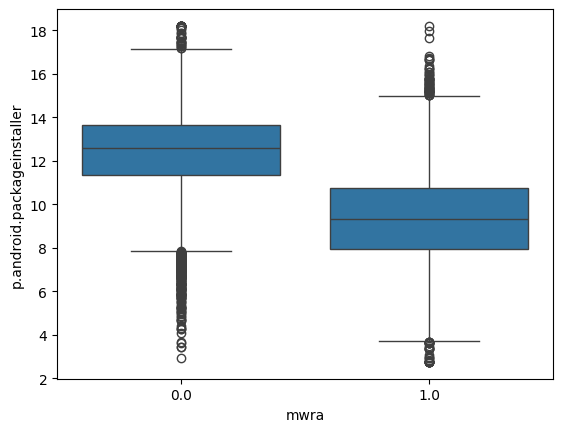

In [39]:
sns.boxplot(x='mwra', y='p.android.packageinstaller', data=processes)

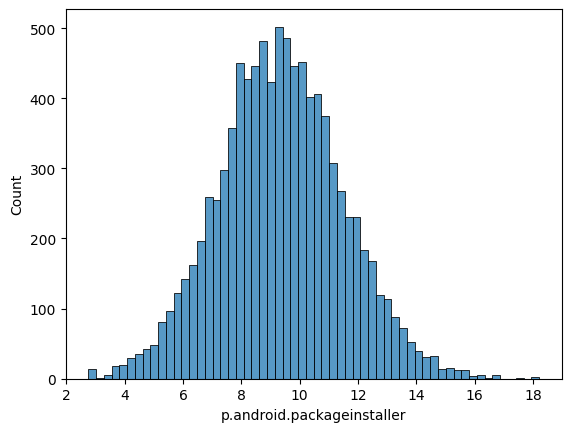

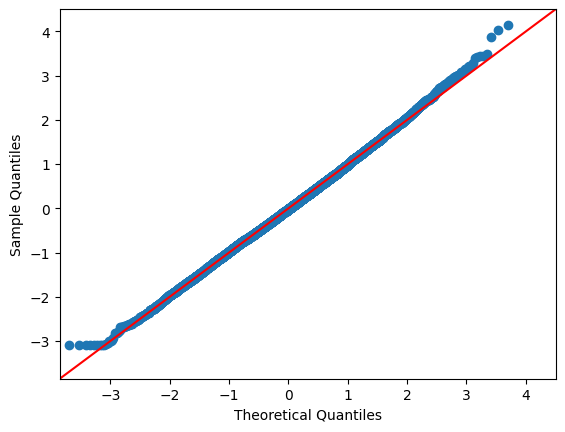

In [40]:
sns.histplot(p_pckg_installer_mwra_1)
_ = sm.ProbPlot(p_pckg_installer_mwra_1, fit=True).qqplot(line='45')

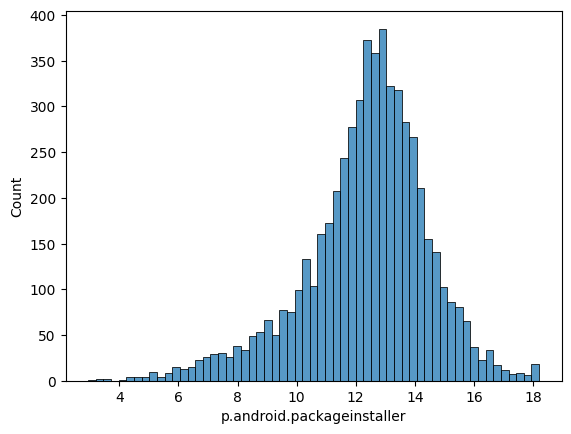

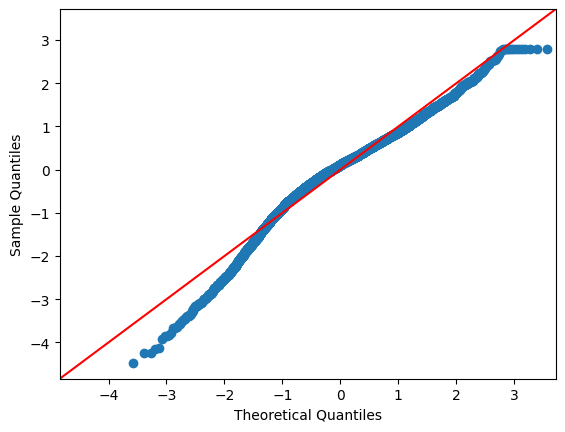

In [41]:
sns.histplot(p_pckg_installer_mwra_0)
_ = sm.ProbPlot(p_pckg_installer_mwra_0, fit=True).qqplot(line='45')

In [42]:
p_pckg_installer_mwra1_anderson = stats.anderson(p_pckg_installer_mwra_1, dist='norm')
critical_value_5_percent = p_pckg_installer_mwra1_anderson.critical_values[2]

if p_pckg_installer_mwra1_anderson.statistic > critical_value_5_percent:
    print("Dáta p_pckg_installer_mwra_1 nie sú normálne distribuované.")
else:
    print("Dáta p_pckg_installer_mwra_1 sú normálne distribuované.")

p_pckg_installer_mwra0_anderson = stats.anderson(p_pckg_installer_mwra_0, dist='norm') 
critical_value_5_percent = p_pckg_installer_mwra0_anderson.critical_values[2]

if p_pckg_installer_mwra0_anderson.statistic > critical_value_5_percent:
    print("Dáta p_pckg_installer_mwra_0 nie sú normálne distribuované.")
else:
    print("Dáta p_pckg_installer_mwra_0 sú normálne distribuované.")

print('Levene test:', stats.levene(p_pckg_installer_mwra_0, p_pckg_installer_mwra_1).pvalue)

Dáta p_pckg_installer_mwra_1 nie sú normálne distribuované.
Dáta p_pckg_installer_mwra_0 nie sú normálne distribuované.
Levene test: 1.841339913492333e-09


In [43]:
stats.mannwhitneyu(p_pckg_installer_mwra_0, p_pckg_installer_mwra_1)

MannwhitneyuResult(statistic=np.float64(45618831.5), pvalue=np.float64(0.0))

**p-value < 0.05**

Zamietame nulovú hypotézu. Rozdiel hodnôt procesu p.android.packageinstaller pri procesoch s mwra=0 a prosesoch s mwra=1 je štatisticky signifikantný.

#### Hypotéza 2

**H0:** hodnota spojenia p.dogalize je v priemere rovnaká pri spojeniach s hodnotou mwra=1 a spojeniach s hodnotou mwra=0

**H1 (Ha):** hodnota spojenia p.dogalize je nižšia/vyššia v spojeniach s mwra=1 ako v spojeniach s mwra=0

In [44]:
c_dogalize1 = connections.loc[processes.mwra == 1, 'c.dogalize']
c_dogalize1.describe()

count    9366.000000
mean       12.638052
std         2.167846
min         4.648030
25%        11.213667
50%        12.662625
75%        14.115267
max        19.316740
Name: c.dogalize, dtype: float64

In [45]:
c_dogalize0 = connections.loc[processes.mwra == 0, 'c.dogalize']
c_dogalize0.describe()

count    5606.000000
mean        9.698569
std         2.183261
min         3.841510
25%         8.237060
50%         9.508410
75%        10.921057
max        18.845080
Name: c.dogalize, dtype: float64

<Axes: xlabel='mwra', ylabel='c.dogalize'>

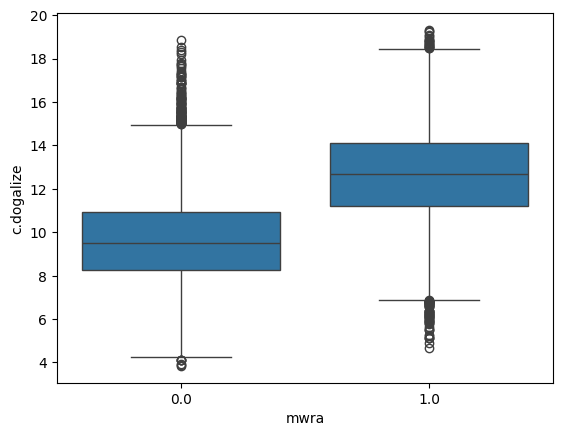

In [46]:
sns.boxplot(x='mwra', y='c.dogalize', data=connections)

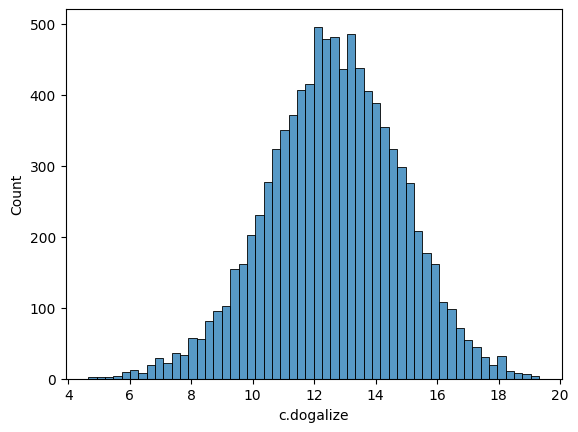

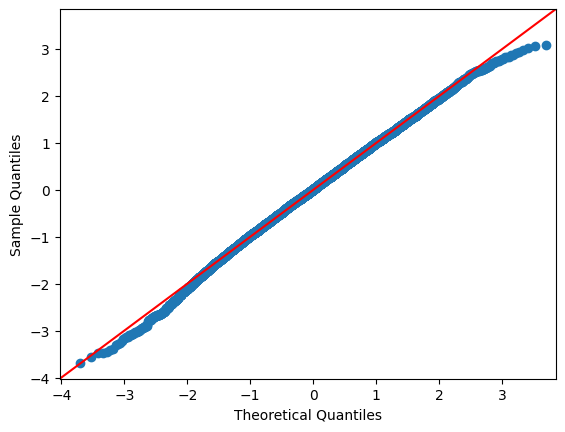

In [47]:
sns.histplot(c_dogalize1)
_ = sm.ProbPlot(c_dogalize1, fit=True).qqplot(line='45')

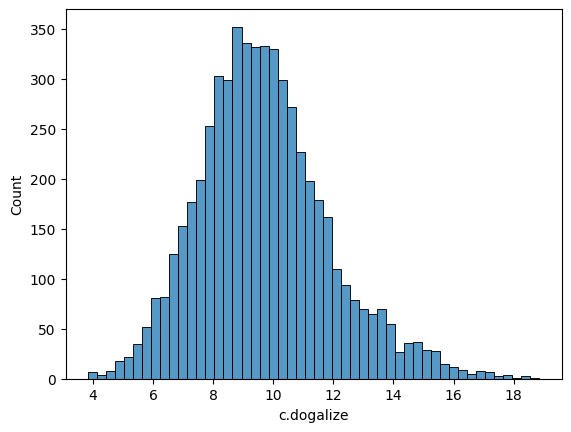

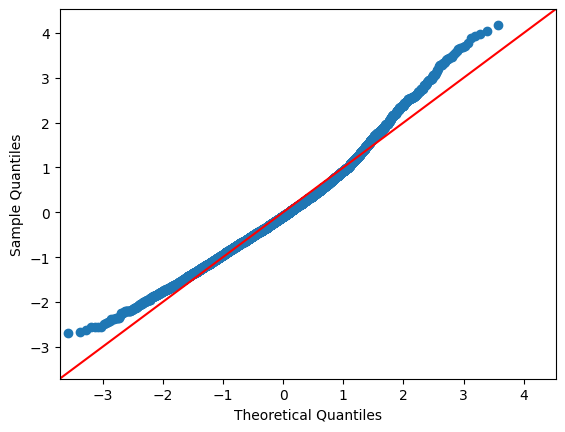

In [48]:
sns.histplot(c_dogalize0)
_ = sm.ProbPlot(c_dogalize0, fit=True).qqplot(line='45')

In [49]:
c_dogalize1_anderson = stats.anderson(c_dogalize1, dist='norm') 
critical_value_5_percent = c_dogalize1_anderson.critical_values[2]

if c_dogalize1_anderson.statistic > critical_value_5_percent:
    print("Dáta c_dogalize1 nie sú normálne distribuované.")
else:
    print("Dáta c_dogalize1 sú normálne distribuované.")

c_dogalize0_anderson = stats.anderson(c_dogalize0, dist='norm') 
critical_value_5_percent = c_dogalize0_anderson.critical_values[2]

if c_dogalize0_anderson.statistic > critical_value_5_percent:
    print("Dáta c_dogalize0 nie sú normálne distribuované.")
else:
    print("Dáta c_dogalize0 sú normálne distribuované.")

print('Levene test:', stats.levene(c_dogalize1, c_dogalize0).pvalue)

Dáta c_dogalize1 nie sú normálne distribuované.
Dáta c_dogalize0 nie sú normálne distribuované.
Levene test: 0.107611381420715


In [50]:
stats.mannwhitneyu(c_dogalize0, c_dogalize1)

MannwhitneyuResult(statistic=np.float64(8666198.0), pvalue=np.float64(0.0))

**p-value < 0.05**

Zamietame nulovú hypotézu. Rozdiel hodnôt spojenia c.dogalize pri spojeniach s mwra=0 a spojeniach s mwra=1 je štatisticky signifikantný.

### (B)

Všetky vzorky dát, ktoré sa podielali na overovaní hypotéz mali pomerne veľký počet záznamov. Anderson testy na zistenie normálnej distribúcie boli robené pri bežnej úrovni signifikancie 0.05. Veľmi nízke hodnoty (zaokrúhlené k 0) neparametrického testu Mann-Whitney U vyjadrujú významný rozdiel medzi testovanými vzorkami. Taktiež prvotné grafy podporovali výsledky hypotéz. Preto považujeme tieto testy za dostatočne štatisticky silné.

<small>Percentuálny podiel práce členov na projekte: Vlastislav Pokorný: 50%, Leon Radó: 50%</small>